The CNN as well as techniques used in the code is reffered from Sentdex Youtube channel Deep learning Cats vs Dogs series. The link for that will be mentioned in the README.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

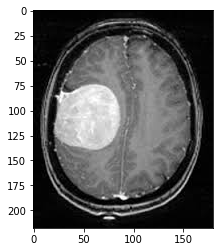

In [2]:
directory="MRI-Scan"
category=["Yes","No"]

for cat in category:
    path=os.path.join(directory,cat)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(218, 180)


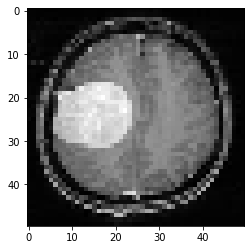

In [4]:
new_array=cv2.resize(img_array,(50,50))
plt.imshow(new_array,cmap="gray")
plt.show()

In [5]:
training_data=[]

def training_data_func():
    for cat in category:
        path=os.path.join(directory,cat)
        class_ind=category.index(cat)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(50,50))
                training_data.append([new_array,class_ind])
            except Exception as e:
                pass
training_data_func()

In [6]:
print(training_data[250])

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [2, 2, 2, ..., 3, 3, 0],
       ...,
       [4, 3, 4, ..., 3, 5, 1],
       [6, 3, 4, ..., 6, 2, 3],
       [4, 5, 8, ..., 6, 2, 7]], dtype=uint8), 1]


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
0
0
0
1
0


In [9]:
x=[]
y=[]

for features,labels in training_data:
    x.append(features)
    y.append(labels)

In [10]:
x=np.array(x).reshape(-1,50,50,1)

In [11]:
import pickle

pickle_out=open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [12]:
pickle_in=open('x.pickle','rb')
x=pickle.load(pickle_in)

In [13]:
x[1]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [14]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Dense
from keras.layers import Dropout,Activation,Flatten
import pickle

x=pickle.load(open('x.pickle','rb'))
y=pickle.load(open('y.pickle','rb'))

x=x/255.0
print(x.shape[1:])

input_shape=x.shape[1:]

Using TensorFlow backend.


(50, 50, 1)


In [15]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

In [16]:
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x,y,batch_size=32,epochs=25,validation_split=0.2)

Train on 202 samples, validate on 51 samples
Epoch 1/25
202/202 [==============================] - 4s 19ms/step - loss: 0.7242 - acc: 0.6089 - val_loss: 0.6323 - val_acc: 0.7451
Epoch 2/25
202/202 [==============================] - 2s 10ms/step - loss: 0.5282 - acc: 0.8069 - val_loss: 0.6016 - val_acc: 0.7255
Epoch 3/25
202/202 [==============================] - 2s 10ms/step - loss: 0.4754 - acc: 0.7822 - val_loss: 0.6132 - val_acc: 0.7059
Epoch 4/25
202/202 [==============================] - 2s 10ms/step - loss: 0.4544 - acc: 0.7921 - val_loss: 0.6937 - val_acc: 0.6667
Epoch 5/25
202/202 [==============================] - 2s 10ms/step - loss: 0.4345 - acc: 0.7921 - val_loss: 0.5893 - val_acc: 0.7843
Epoch 6/25
202/202 [==============================] - 2s 10ms/step - loss: 0.4187 - acc: 0.8317 - val_loss: 0.6367 - val_acc: 0.7255
Epoch 7/25
202/202 [==============================] - 2s 10ms/step - loss: 0.3972 - acc: 0.8069 - val_loss: 0.6107 - val_acc: 0.7647
Epoch 8/25
202/202 [====

In [18]:
model_json=model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
model.save("keras_mri.model")